In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from pivottablejs import pivot_ui
from jupyter_core.paths import jupyter_data_dir

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) Read in and Clean Data

In [3]:
df = pd.read_csv('project_3_final_table.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'caseid_new', 'children_in_hh', 'age_difference',
       'race_gap', 'religious_gap', 'edu_gap', 'met_online', 'met_at_work',
       'met_at_school', 'met_at_church', 'met_travel', 'met_social',
       'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
       'met_offline_dating', 'met_other', 'how_met_count', 'relationship_len',
       'partner_deceased', 'married_w1_married', 'married_w1_not married',
       'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5',
       'age_gap_bin_6 to 10', 'age_gap_bin_>=20',
       'same_sex_couple_different sex couple',
       'same_sex_couple_same-sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'edu_gap_bin_>6',
       'parental_approval_approve', 'parental_approval_dont_approve',
       'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
       'relationship_quality_w1_good', 'relationship_quality_w1_poor',
       'relationship_quality_w1_v

In [5]:
df.head()

Unnamed: 0  caseid_new  children_in_hh  age_difference  race_gap  \
0           0       22526               0             4.0         1   
1           1       23286               0             2.0         0   
2           2       26315               0             9.0         0   
3           3       28536               0             2.0         0   
4           4       29584               0             7.0         0   

   religious_gap  edu_gap  met_online  met_at_work  met_at_school  ...  \
0              1      2.0           1            0              0  ...   
1              1      1.0           0            0              1  ...   
2              1      2.0           1            0              0  ...   
3              1      1.0           0            0              0  ...   
4              0      0.0           0            1              0  ...   

   region_south  region_west  partner_political  resondent_political  \
0             0            0           democrat             democrat   
1             0            1           democrat             democrat   
2             1            0           democrat             democrat   
3             0            0           democrat             democrat   
4             1            0           democrat             democrat   

        income_gap_raw  same_political  income_gap  respondent_earn_more  \
0  partner earned more               1         1.0                   0.0   
1        i earned more               1         1.0                   1.0   
2        i earned more               1         1.0                   1.0   
3        i earned more               1         1.0                   1.0   
4  partner earned more               1         1.0                   0.0   

   relationship_quality_w1  relationship_len_cat  
0                     good       second_quartile  
1                     good       second_quartile  
2                     good       bottom_quartile  
3                     good       second_quartile  
4                     good          top_quartile  

[5 rows x 58 columns]

In [6]:
# check which columns have NaN
# df.isnull().sum()

# age_difference                           19
# relationship_len                         27
# age_when_met                             15
# family_size                              13
# income_gap                               31
# respondent_earn_more                    405
# relationship_quality_w1                  13

In [7]:
df['relationship_quality_w1'].value_counts()

excellent    1771
good          911
fair          252
poor           42
very poor      20
Name: relationship_quality_w1, dtype: int64

In [8]:
df['respondent_earn_more'].value_counts()

1.0    1332
0.0    1272
Name: respondent_earn_more, dtype: int64

In [9]:
# Fill NaN with either mode or mean

df['age_difference'].fillna(round(df['age_difference'].mean()), inplace=True)
df['relationship_len'].fillna(round(df['relationship_len'].mean()), inplace=True)
df['age_when_met'].fillna(round(df['age_when_met'].mean()), inplace=True)
df['family_size'].fillna(round(df['family_size'].mean()), inplace=True)
df['income_gap'].fillna(round(df['income_gap'].mean()), inplace=True)
df['relationship_quality_w1'].fillna(0, inplace=True)
df['respondent_earn_more'].fillna(0, inplace=True)

In [10]:
# df.isnull().sum()

# 2) Run Model

In [11]:
df.columns

Index(['Unnamed: 0', 'caseid_new', 'children_in_hh', 'age_difference',
       'race_gap', 'religious_gap', 'edu_gap', 'met_online', 'met_at_work',
       'met_at_school', 'met_at_church', 'met_travel', 'met_social',
       'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
       'met_offline_dating', 'met_other', 'how_met_count', 'relationship_len',
       'partner_deceased', 'married_w1_married', 'married_w1_not married',
       'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5',
       'age_gap_bin_6 to 10', 'age_gap_bin_>=20',
       'same_sex_couple_different sex couple',
       'same_sex_couple_same-sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'edu_gap_bin_>6',
       'parental_approval_approve', 'parental_approval_dont_approve',
       'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
       'relationship_quality_w1_good', 'relationship_quality_w1_poor',
       'relationship_quality_w1_v

## Test out different X variables

In [12]:
### All columns ####

X = df[['children_in_hh', 'race_gap', 'religious_gap',
        'met_online', 'met_at_work','met_at_school', 'met_at_church', 'met_travel', 'met_social',
        'met_party', 'met_f_and_f', 'met_as_neighbors', 'met_public_space',
        'met_offline_dating', 'met_other',
        'married_w1_married', 
        'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5','age_gap_bin_6 to 10', 'age_gap_bin_>=20',
        'same_sex_couple_different sex couple',
        'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4','edu_gap_bin_5 to 6','edu_gap_bin_>6',
        'parental_approval_approve',
        'relationship_quality_w1_excellent', 'relationship_quality_w1_fair',
        'relationship_quality_w1_good', 'relationship_quality_w1_poor',
        'relationship_quality_w1_very poor', 'age_when_met', 'family_size','metro',
        'region_midwest', 'region_northeast', 'region_south','region_west',
        'same_political', 'income_gap']]

print(X.shape)

(3009, 41)


In [13]:
# X = df[['children_in_hh', 'race_gap', 'religious_gap','married_w1_married', 
#         'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20', 'age_gap_bin_4 to 5','age_gap_bin_6 to 10', 'age_gap_bin_>=20',
#         'same_sex_couple_different sex couple',
#         'edu_gap_bin_0 to 2','edu_gap_bin_3 to 4','edu_gap_bin_5 to 6','edu_gap_bin_>6',
#         'parental_approval_approve','age_when_met', 'family_size','metro',
#         'region_midwest', 'region_northeast', 'region_south','region_west',
#         'same_political', 'income_gap']]

# print(X.shape)

In [14]:
# X = df[['children_in_hh', 'race_gap', 'religious_gap',
#         'met_online', 'age_gap_bin_0 to 3','same_sex_couple_different sex couple',
#         'edu_gap_bin_0 to 2','parental_approval_approve',
#         'relationship_quality_w1_excellent','age_when_met', 'family_size','metro',
#         'region_midwest', 'region_northeast', 'region_south','region_west',
#         'same_political', 'income_gap']]

# print(X.shape)

In [15]:
## Keep only the variables with positive coefficient

# 5 met at work
# 12 met as neighbors
# 15 met other
# 16 married
# 28 excellent
# 37 region_northeast
# 38 region_south

# X = df[['met_at_work','married_w1_married', 'relationship_quality_w1_excellent', 'region_northeast']]

# print(X.shape)

In [16]:
y = df["relationship_len"].values.reshape(-1, 1)

print(y.shape)

(3009, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Try scaling it

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [19]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
y_scaled = y_scaler.transform(y)

## Fit model and run the R2 and MSE scores

In [20]:
model = LinearRegression()

In [21]:
#### Using unscaled data
# model.fit(X_train, y_train)

In [22]:
#### Using scaled data

model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
##################################################################################
############## Calculate Model Performance Metrics #####
##################################################################################

In [24]:
predictions_test = model.predict(X_test_scaled)

In [25]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(y_test_scaled, predictions_test)
r2 = model.score(X_test_scaled, y_test_scaled)
 
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5296014698104934, R2: 0.48350624086423344


In [26]:
###### Another Way to calculate R2 #########

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print("training score: ", training_score)
print("test score: ", testing_score)

training score:  0.49579426318102005
test score:  0.48350624086423344


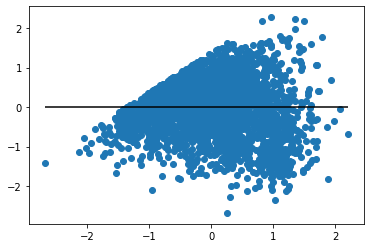

In [27]:
################### Check Residual Plots ####################


# Make predictions (scaled data)

# predictions_training = model.predict(X_train_scaled)

# predictions_test = model.predict(X_test_scaled)

predictions_all_X = model.predict(X_scaled)



################### Plot Residuals (scaled data)

# # 1) Training Data Residual Plot #####

# plt.scatter(predictions_training, predictions_training - y_train_scaled)
# plt.hlines(y=0, xmin=predictions_training.min(), xmax=predictions_training.max())


# # 2) Test Data Residual Plot #####

# plt.scatter(predictions_test, predictions_test - y_test_scaled)
# plt.hlines(y=0, xmin=predictions_test.min(), xmax=predictions_test.max())


# 3) All Data ####

plt.scatter(predictions_all_X, predictions_all_X - y_scaled)
plt.hlines(y=0, xmin=predictions_all_X.min(), xmax=predictions_all_X.max())


plt.show()

## Print out coefficients

In [28]:
print('Weight coefficients: ', model.coef_)

Weight coefficients:  [[-1.69793546e-01 -4.89414266e-02 -7.13028554e-02 -1.48229718e-01
   1.18042826e-03 -7.14682026e-02 -1.04095339e-02 -1.19568912e-02
  -3.97186287e-02 -6.26974821e-03 -1.70783684e-02  1.44474317e-02
  -1.83140233e-04 -1.72758015e-02  8.15151218e-02  3.98187078e-01
  -2.13449128e-01 -1.30114543e-01 -1.54291853e-01 -1.75564837e-01
  -3.70055091e-02 -7.35364292e-02 -2.35427469e-01 -2.19736539e-01
  -8.45237101e-02 -2.01347486e-02 -3.45716682e-01  5.50467960e-02
  -5.45800500e-02 -1.34512814e-02 -3.21378083e-02 -3.13405325e-02
  -3.16487432e-01 -1.25044685e-02 -3.15442126e-02 -4.26195485e-03
   5.32349612e-03  6.22242412e-04 -1.47865627e-03 -8.10964480e-03
   1.24366170e-02]]


In [29]:
print('y-axis intercept: ', model.intercept_) 

y-axis intercept:  [1.68313e-16]


### Making the coefficients more readable

In [33]:
columns = X.columns
columns

Index(['children_in_hh', 'race_gap', 'religious_gap', 'met_online',
       'met_at_work', 'met_at_school', 'met_at_church', 'met_travel',
       'met_social', 'met_party', 'met_f_and_f', 'met_as_neighbors',
       'met_public_space', 'met_offline_dating', 'met_other',
       'married_w1_married', 'age_gap_bin_0 to 3', 'age_gap_bin_11 to 20',
       'age_gap_bin_4 to 5', 'age_gap_bin_6 to 10', 'age_gap_bin_>=20',
       'same_sex_couple_different sex couple', 'edu_gap_bin_0 to 2',
       'edu_gap_bin_3 to 4', 'edu_gap_bin_5 to 6', 'edu_gap_bin_>6',
       'parental_approval_approve', 'relationship_quality_w1_excellent',
       'relationship_quality_w1_fair', 'relationship_quality_w1_good',
       'relationship_quality_w1_poor', 'relationship_quality_w1_very poor',
       'age_when_met', 'family_size', 'metro', 'region_midwest',
       'region_northeast', 'region_south', 'region_west', 'same_political',
       'income_gap'],
      dtype='object')

In [35]:
numbers = model.coef_[0]
numbers

array([-1.69793546e-01, -4.89414266e-02, -7.13028554e-02, -1.48229718e-01,
        1.18042826e-03, -7.14682026e-02, -1.04095339e-02, -1.19568912e-02,
       -3.97186287e-02, -6.26974821e-03, -1.70783684e-02,  1.44474317e-02,
       -1.83140233e-04, -1.72758015e-02,  8.15151218e-02,  3.98187078e-01,
       -2.13449128e-01, -1.30114543e-01, -1.54291853e-01, -1.75564837e-01,
       -3.70055091e-02, -7.35364292e-02, -2.35427469e-01, -2.19736539e-01,
       -8.45237101e-02, -2.01347486e-02, -3.45716682e-01,  5.50467960e-02,
       -5.45800500e-02, -1.34512814e-02, -3.21378083e-02, -3.13405325e-02,
       -3.16487432e-01, -1.25044685e-02, -3.15442126e-02, -4.26195485e-03,
        5.32349612e-03,  6.22242412e-04, -1.47865627e-03, -8.10964480e-03,
        1.24366170e-02])

In [50]:
coef_df=pd.DataFrame(numbers,columns,columns=['coef'])
coef_df=coef_df.reset_index()
coef_df=coef_df.rename(columns={'index':'X_variables'})
coef_df['abs_coef'] = abs(coef_df['coef'])
coef_df = coef_df.sort_values(['abs_coef'],ascending=False)
coef_df

X_variables      coef  abs_coef
15                    married_w1_married  0.398187  0.398187
26             parental_approval_approve -0.345717  0.345717
32                          age_when_met -0.316487  0.316487
22                    edu_gap_bin_0 to 2 -0.235427  0.235427
23                    edu_gap_bin_3 to 4 -0.219737  0.219737
16                    age_gap_bin_0 to 3 -0.213449  0.213449
19                   age_gap_bin_6 to 10 -0.175565  0.175565
0                         children_in_hh -0.169794  0.169794
18                    age_gap_bin_4 to 5 -0.154292  0.154292
3                             met_online -0.148230  0.148230
17                  age_gap_bin_11 to 20 -0.130115  0.130115
24                    edu_gap_bin_5 to 6 -0.084524  0.084524
14                             met_other  0.081515  0.081515
21  same_sex_couple_different sex couple -0.073536  0.073536
5                          met_at_school -0.071468  0.071468
2                          religious_gap -0.071303  0.071303
27     relationship_quality_w1_excellent  0.055047  0.055047
28          relationship_quality_w1_fair -0.054580  0.054580
1                               race_gap -0.048941  0.048941
8                             met_social -0.039719  0.039719
20                      age_gap_bin_>=20 -0.037006  0.037006
30          relationship_quality_w1_poor -0.032138  0.032138
34                                 metro -0.031544  0.031544
31     relationship_quality_w1_very poor -0.031341  0.031341
25                        edu_gap_bin_>6 -0.020135  0.020135
13                    met_offline_dating -0.017276  0.017276
10                           met_f_and_f -0.017078  0.017078
11                      met_as_neighbors  0.014447  0.014447
29          relationship_quality_w1_good -0.013451  0.013451
33                           family_size -0.012504  0.012504
40                            income_gap  0.012437  0.012437
7                             met_travel -0.011957  0.011957
6                          met_at_church -0.010410  0.010410
39                        same_political -0.008110  0.008110
9                              met_party -0.006270  0.006270
36                      region_northeast  0.005323  0.005323
35                        region_midwest -0.004262  0.004262
38                           region_west -0.001479  0.001479
4                            met_at_work  0.001180  0.001180
37                          region_south  0.000622  0.000622
12                      met_public_space -0.000183  0.000183